In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
df = pd.read_csv("AdmissionData.csv")
col_names=df.columns.tolist()
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
targets = df['Chance of Admit']
features = df.drop(columns = {'Chance of Admit'})

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
forest = RandomForestRegressor(n_estimators=210,max_depth=6,random_state=0)
forest.fit(X_train, y_train)
y_predict = forest.predict(X_test)
forest_score = (forest.score(X_test, y_test))*100

In [16]:
print("Accuracy Acheived= ", forest_score,"%!")

Accuracy Acheived=  82.02585333835857 %!


In [6]:
test_set_sme = mean_squared_error(y_test, y_predict)
test_set_rmse = np.sqrt(test_set_sme)
test_set_r2 = r2_score(y_test, y_predict)

In [7]:
print("Squared Mean Error= ", test_set_sme)
print("Root Squared Mean Error= ", test_set_rmse)
print("Coefficient of Determination= ", test_set_r2)

Squared Mean Error=  0.0036757129923056745
Root Squared Mean Error=  0.060627658641132384
Coefficient of Determination=  0.8202585333835857


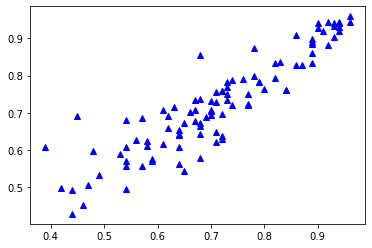

In [17]:
plt.plot(y_test,y_predict,'^',color='blue');

In [28]:
importance = (sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_), features), reverse=True))
for _ in importance:
    print (_)

(0.7515, 'CGPA')
(0.1272, 'GRE Score')
(0.0529, 'Serial No.')
(0.0283, 'TOEFL Score')
(0.012, 'SOP')
(0.0115, 'LOR')
(0.0088, 'University Rating')
(0.0078, 'Research')
